<a href="https://colab.research.google.com/github/OmarK920/DataEngineerinM2/blob/main/commit2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports**

In [1]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches

**Reading Datasets**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df_flights = pd.read_csv('/content/drive/MyDrive/flights.csv')


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df_airports = pd.read_csv('/content/drive/MyDrive/airports.csv')


In [5]:
df_airlines = pd.read_csv('/content/drive/MyDrive/airlines.csv')


In [6]:
df_airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [7]:
df_flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [ ]:
#################################################################

**Data Integration**

In [9]:
#merge to df_airlines,df_flights datasets
df_demo3 = pd.merge(df_airlines,df_flights, left_on="IATA_CODE", right_on="AIRLINE")

In [10]:
df_demo3.head(2)

,IATA_CODE,AIRLINE_x,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_y,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,UA,United Air Lines Inc.,2015,1,1,4,UA,1197,N78448,SFO,...,619.0,-7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,UA,United Air Lines Inc.,2015,1,1,4,UA,1545,N76517,LAX,...,607.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_demo3.columns

Index(['IATA_CODE', 'AIRLINE_x', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK',
       'AIRLINE_y', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED',
       'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY'],
      dtype='object')

In [12]:
#
main_df = pd.merge(df_airports, df_demo3, left_on="IATA_CODE", right_on="DESTINATION_AIRPORT")

In [13]:
main_df.head(2)

,IATA_CODE_x,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,IATA_CODE_y,AIRLINE_x,YEAR,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,OO,Skywest Airlines Inc.,2015,...,1612.0,51.0,0,0,NaN,0.0,0.0,51.0,0.0,0.0
1,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,OO,Skywest Airlines Inc.,2015,...,1532.0,11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


**Data Cleaning**

In [14]:
main_df.isnull().sum() 

IATA_CODE_x                  0
AIRPORT                      0
CITY                         0
STATE                        0
COUNTRY                      0
LATITUDE                  4610
LONGITUDE                 4610
IATA_CODE_y                  0
AIRLINE_x                    0
YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE_y                    0
FLIGHT_NUMBER                0
TAIL_NUMBER              14367
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           83814
DEPARTURE_DELAY          83814
TAXI_OUT                 86612
WHEELS_OFF               86612
SCHEDULED_TIME               6
ELAPSED_TIME            101784
AIR_TIME                101784
DISTANCE                     0
WHEELS_ON                89942
TAXI_IN                  89942
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             89942
ARRIVAL_DELAY           101784
DIVERTED

In [15]:
#here we are going to drop unecessary columns and columns which have many missing values

main_df.drop('TAIL_NUMBER' , axis = 1 , inplace = True)
main_df.drop('DEPARTURE_TIME' , axis = 1 , inplace = True)
main_df.drop('DEPARTURE_DELAY' , axis = 1 , inplace = True)
main_df.drop('TAXI_OUT' , axis = 1 , inplace = True)
main_df.drop('WHEELS_OFF' , axis = 1 , inplace = True)
main_df.drop('ELAPSED_TIME' , axis = 1 , inplace = True)
main_df.drop('AIR_TIME' , axis = 1 , inplace = True)
main_df.drop('WHEELS_ON' , axis = 1 , inplace = True)
main_df.drop('TAXI_IN' , axis = 1 , inplace = True)
main_df.drop('ARRIVAL_TIME' , axis = 1 , inplace = True)
main_df.drop('ARRIVAL_DELAY' , axis = 1 , inplace = True)
main_df.drop('CANCELLATION_REASON' , axis = 1 , inplace = True)
main_df.drop('AIR_SYSTEM_DELAY' , axis = 1 , inplace = True)
main_df.drop('SECURITY_DELAY' , axis = 1 , inplace = True)
main_df.drop('AIRLINE_DELAY' , axis = 1 , inplace = True)
main_df.drop('LATE_AIRCRAFT_DELAY' , axis = 1 , inplace = True)
main_df.drop('WEATHER_DELAY' , axis = 1 , inplace = True)



In [16]:
main_df.isnull().sum()

IATA_CODE_x               0
AIRPORT                   0
CITY                      0
STATE                     0
COUNTRY                   0
LATITUDE               4610
LONGITUDE              4610
IATA_CODE_y               0
AIRLINE_x                 0
YEAR                      0
MONTH                     0
DAY                       0
DAY_OF_WEEK               0
AIRLINE_y                 0
FLIGHT_NUMBER             0
ORIGIN_AIRPORT            0
DESTINATION_AIRPORT       0
SCHEDULED_DEPARTURE       0
SCHEDULED_TIME            6
DISTANCE                  0
SCHEDULED_ARRIVAL         0
DIVERTED                  0
CANCELLED                 0
dtype: int64

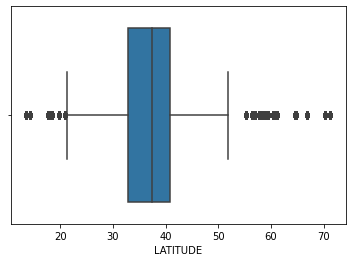

In [17]:
#Detecting and Removing Outliers
#box-plot before removing outliers
sns.boxplot(x=main_df['LATITUDE'])

In [18]:
Q1 = main_df['LATITUDE'].quantile(0.25)
Q3 = main_df['LATITUDE'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

7.892440000000001


In [19]:
arr_1 = main_df['LATITUDE'] < (Q1 - 1.5 * IQR)
arr_2 = main_df['LATITUDE'] > (Q3 + 1.5 * IQR)
mask = (arr_1 | arr_2)

In [20]:
print("No. of outliers: ", mask.sum())

No. of outliers:  103151


In [21]:
#Removing the outliers
main_df = main_df[~(mask)]
main_df.head()

,IATA_CODE_x,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,IATA_CODE_y,AIRLINE_x,YEAR,...,AIRLINE_y,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,OO,Skywest Airlines Inc.,2015,...,OO,4507,DTW,ABE,1355,86.0,425,1521,0,0
1,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,OO,Skywest Airlines Inc.,2015,...,OO,4507,DTW,ABE,1355,86.0,425,1521,0,0
2,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,OO,Skywest Airlines Inc.,2015,...,OO,4507,DTW,ABE,1355,86.0,425,1521,0,0
3,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,OO,Skywest Airlines Inc.,2015,...,OO,4507,DTW,ABE,1355,86.0,425,1521,0,0
4,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,OO,Skywest Airlines Inc.,2015,...,OO,4507,DTW,ABE,1355,86.0,425,1521,0,0


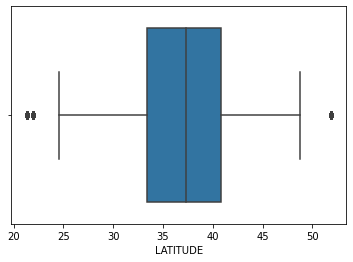

In [22]:
#box-plot after removing outliers
sns.boxplot(x=main_df['LATITUDE'])

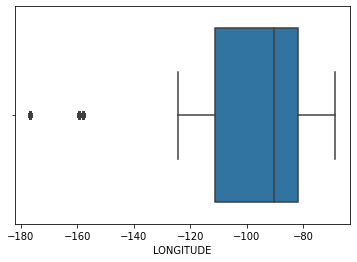

In [23]:
#box-plot before removing outliers
sns.boxplot(x=main_df['LONGITUDE'])

In [24]:
Q1 = main_df['LONGITUDE'].quantile(0.25)
Q3 = main_df['LONGITUDE'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

29.429779999999994


In [25]:
arr_1 = main_df['LONGITUDE'] < (Q1 - 1.5 * IQR)
arr_2 = main_df['LONGITUDE'] > (Q3 + 1.5 * IQR)
mask = (arr_1 | arr_2)

In [26]:
print("No. of outliers: ", mask.sum())

No. of outliers:  53798


In [27]:
#Removing the outliers
main_df = main_df[~(mask)]
main_df.head()

,IATA_CODE_x,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,IATA_CODE_y,AIRLINE_x,YEAR,...,AIRLINE_y,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,OO,Skywest Airlines Inc.,2015,...,OO,4507,DTW,ABE,1355,86.0,425,1521,0,0
1,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,OO,Skywest Airlines Inc.,2015,...,OO,4507,DTW,ABE,1355,86.0,425,1521,0,0
2,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,OO,Skywest Airlines Inc.,2015,...,OO,4507,DTW,ABE,1355,86.0,425,1521,0,0
3,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,OO,Skywest Airlines Inc.,2015,...,OO,4507,DTW,ABE,1355,86.0,425,1521,0,0
4,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.4404,OO,Skywest Airlines Inc.,2015,...,OO,4507,DTW,ABE,1355,86.0,425,1521,0,0


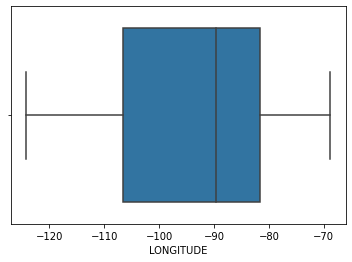

In [28]:
#box-plot after removing outliers
sns.boxplot(x=main_df['LONGITUDE'])

In [29]:
#fill the missing values for numerical terms - mean(Continous Variables) - after removing outliers
main_df['LONGITUDE'] = main_df['LONGITUDE'].fillna(main_df['LONGITUDE'].mean())
main_df['LATITUDE'] = main_df['LATITUDE'].fillna(main_df['LATITUDE'].mean())


In [30]:
main_df.isnull().sum()

IATA_CODE_x            0
AIRPORT                0
CITY                   0
STATE                  0
COUNTRY                0
LATITUDE               0
LONGITUDE              0
IATA_CODE_y            0
AIRLINE_x              0
YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE_y              0
FLIGHT_NUMBER          0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
SCHEDULED_TIME         6
DISTANCE               0
SCHEDULED_ARRIVAL      0
DIVERTED               0
CANCELLED              0
dtype: int64

**Data Visualization**

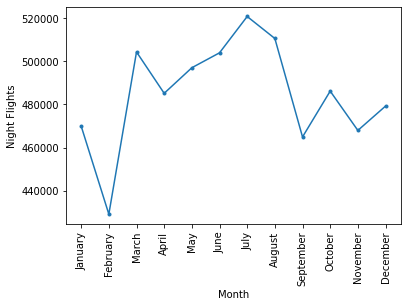

In [ ]:
# How many flights in each month of the year?
import datetime as dt

months = []
for month in range(1, 13):
    months.append(dt.datetime(year=1995, month=month, day=1).strftime("%B"))

fl_per_month = list(df_flights.groupby('MONTH').count().YEAR
)
plt.xlabel('Month')
plt.ylabel('Night Flights')
plt.xticks(range(1,13), months, rotation='vertical')
plt.plot(range(1,13), np.array(fl_per_month), '.-')
plt.show()